Name : Chathumini B.G.D.T.

Index Number : 190107T

Github Repo:
https://github.com/dulmi-19/Image-Processing-and-Machine-Vision

Question 1

x=  -2.4003994283530288 f(x) =  -53.11840483760499


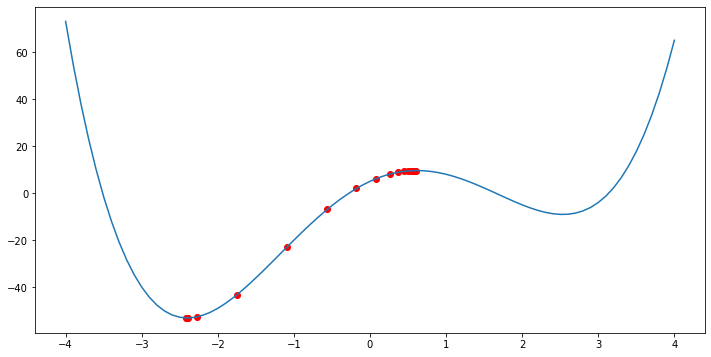

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    w = np.array([1,-1,-12,15,5])
    M = np.size(w)-1
    return np.sum([x**i*w[M-i] for i in range(0,M+1)], axis=0)

def g(x):
    w = np.array([1,-1,-12,15,5])
    M = np.size(w)-1
    return np.sum([i*x**(i-1)*w[M-i] for i in range(0,M+1)], axis=0)

alpha = 0.02
x = 0.6
x_hist = np.array(x)
fx_hist = np.array(f(x))
for i in range(20):
    x = x - alpha*g(x)
    x_hist= np.append(x_hist, x)
    fx_hist= np.append(fx_hist, f(x))

print('x= ',x,'f(x) = ',f(x))

fig = plt.figure(figsize = (12,6))
ax = plt.subplot(1,1,1)
delta = 0.1
x_ = np.arange(-4,4+delta,delta)
ax.plot(x_,f(x_))
ax.scatter(x_hist,fx_hist, c='r')

In [ ]:
# finding a root close to x0
from scipy.optimise import fsolve
from scipy.optimise import minimize
x0=0.7
root = fsolve(g,x0) #gradient is zero ath this point
print(root)

#Using scipy to find minimum
minimum = minimize(f,x0)
print(minimum)

Question 2

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 , mnist

( x_train , y_train ) , ( x_test , y_tes t ) = c i far10 . load_data ( )
# ( x_train , y_train ) , ( x_test , y_tes t ) = mnist . load_data ( )
print ( " x_train => " , x_train.shape )

Ntr = x_train.shape [ 0 ]
Nte = x_test.shape [ 0 ]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
x_train = x_train[ range (Ntr ) , : ]
x_test = x_test[ range (Nte ) , : ]
y_train = y_train[ range (Ntr ) ]
y_test = y_test[ range (Nte ) ]